<font color="blue" size ="6"><b>WELCOME TO PROJECT EXPO</b></font>

<font color="yellow" size="4"><b>6_CNN_SHELLS_PEBBLES </b></font>

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

In [2]:
# split data in a new folder named data-split
splitfolders.ratio("C:/Users/Administrator/Desktop/SHELL/", output="C:/Users/Administrator/Desktop/SHELL/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

Copying files: 3558 files [00:32, 108.73 files/s]


In [3]:
datagen = ImageDataGenerator()

In [4]:
# define classes name
class_names = ['Pebbles','Shells']

In [5]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/SHELL/data-split/train", 
    classes = class_names,
    target_size=(200, 150),  
    batch_size=32, 
    class_mode="binary", 
)

Found 2489 images belonging to 2 classes.


In [6]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/SHELL/data-split/val/", 
    classes = class_names,
    target_size=(200, 150), 
    batch_size=32, 
    class_mode="binary", 
)

Found 711 images belonging to 2 classes.


In [7]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/SHELL/data-split/test/", 
    classes = class_names,
    target_size=(200, 150), 
    batch_size=32, 
    class_mode="binary", 
)

Found 358 images belonging to 2 classes.


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model_history =model.fit(train_generator, validation_data=valid_generator, epochs=10, batch_size=32)

Epoch 1/10
78/78 [==============================] - 71s 892ms/step - loss: 94.2254 - accuracy: 0.5773 - val_loss: 0.6604 - val_accuracy: 0.6076
Epoch 2/10
78/78 [==============================] - 52s 671ms/step - loss: 0.6492 - accuracy: 0.6396 - val_loss: 0.7258 - val_accuracy: 0.6048
Epoch 3/10
78/78 [==============================] - 54s 689ms/step - loss: 0.5545 - accuracy: 0.7007 - val_loss: 0.7712 - val_accuracy: 0.5949
Epoch 4/10
78/78 [==============================] - 54s 687ms/step - loss: 0.4668 - accuracy: 0.7750 - val_loss: 0.8276 - val_accuracy: 0.5724
Epoch 5/10
78/78 [==============================] - 53s 673ms/step - loss: 0.4161 - accuracy: 0.8337 - val_loss: 1.1481 - val_accuracy: 0.5865
Epoch 6/10
78/78 [==============================] - 54s 688ms/step - loss: 0.3356 - accuracy: 0.8638 - val_loss: 1.0812 - val_accuracy: 0.5626
Epoch 7/10
78/78 [==============================] - 54s 695ms/step - loss: 0.2723 - accuracy: 0.8988 - val_loss: 1.2337 - val_accuracy: 0.621

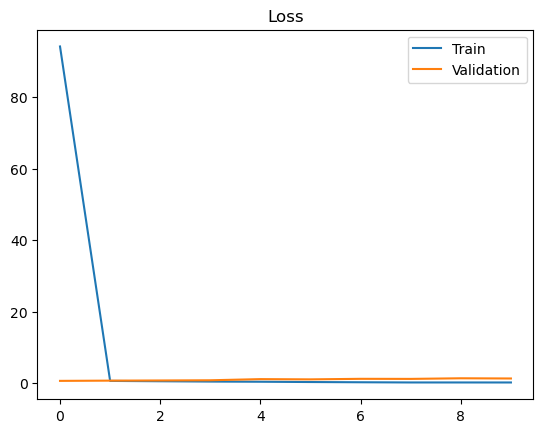

In [10]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

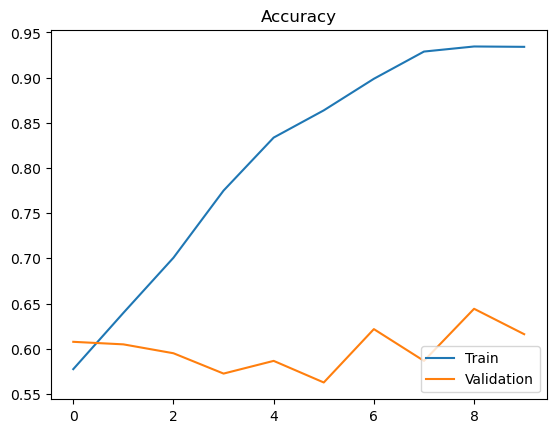

In [11]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

12/12 [==============================] - 4s 316ms/step - loss: 1.0204 - accuracy: 0.6201
The test loss is:  1.0203560590744019
The best accuracy is:  62.011170387268066


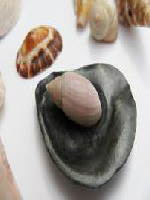

In [15]:
img = tf.keras.preprocessing.image.load_img('C:/Users/Administrator/Desktop/SHELL/data-split/test/Shells/Shells (588).jpg', target_size=(200, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [16]:
# generate predictions for samples
prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    print("Pebbles")
else:
    print("Shells")

1/1 [==============================] - 0s 35ms/step
Shells


In [17]:
# Save the entire model as a `.keras` zip archive
model.save('my_model.keras')

In [18]:
# Save the model weights
model.save_weights('my_model_weights.ckpt')